<a href="https://colab.research.google.com/github/PaoloVerCoquimbo/Challenge_1_DataLover_Alura_Oracle_OneG9_08112025/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [84]:
import pandas as pd
import matplotlib.pyplot as plt





url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,$ 164.300,$ 6.900,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,$ 5,$ -74
1,Mesa de comedor,Muebles,$ 192.300,$ 8.400,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,$ 6,$ -76
2,Juego de mesa,Juguetes,$ 209.600,$ 15.900,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,$ 10,$ -76
3,Microondas,Electrodomésticos,$ 757.500,$ 41.000,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,$ 3,$ -77
4,Silla de oficina,Muebles,$ 335.200,$ 20.200,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,$ 6,$ -76


# 0. Estructuración de DataFrame y limpieza de  Datos relevantes para el objetivo del Cliente






## 0.0  asigna una nueva columna a los df para agilizar los analisis

---


### columna Tienda

In [85]:
# Se agrega una nueva columna llamada "Tienda" a cada DataFrame.
# Esto permite identificar de qué tienda proviene cada fila,
# especialmente útil cuando luego unirás (concat) los DataFrames
# para analizarlos juntos.

# A cada DataFrame se le asigna un nombre fijo de tienda.
# Así, todas las filas de tienda1 tendrán "Tienda 1", etc.

tienda1['Tienda'] = 'Tienda 1'   # Añade columna con nombre de la tienda al DataFrame tienda1
tienda2['Tienda'] = 'Tienda 2'   # Lo mismo para tienda2
tienda3['Tienda'] = 'Tienda 3'   # Lo mismo para tienda3
tienda4['Tienda'] = 'Tienda 4'   # Lo mismo para tienda4


###  Revisamos en la Data de las tiendas  la cantidad de filas y columnas por tienda según su data cuantificable

In [86]:
# Crear un diccionario con las formas (filas, columnas) de cada DataFrame
# .shape devuelve una tupla (n_filas, n_columnas). Así guardas la estructura de cada tienda.
formas_tiendas = {
    "Tienda 1": tienda1.shape,
    "Tienda 2": tienda2.shape,
    "Tienda 3": tienda3.shape,
    "Tienda 4": tienda4.shape
}

# Convertir el diccionario a un DataFrame para visualizarlo mejor
# list(diccionario.items()) genera pares: ("Tienda X", (filas, columnas))
formas_df = pd.DataFrame(list(formas_tiendas.items()), columns=["Tienda", "Dimensiones"])

# Separar las tuplas (filas, columnas) en dos columnas diferentes
# "Dimensiones" contiene tuplas. Con .tolist() las expandimos en dos columnas nuevas.
formas_df[["Filas", "Columnas"]] = pd.DataFrame(
    formas_df["Dimensiones"].tolist(),
    index=formas_df.index
)

# Eliminar la columna 'Dimensiones' original para dejar solo Filas y Columnas limpias
formas_df = formas_df.drop(columns=["Dimensiones"])

# Mostrar el resultado en pantalla
formas_df



,Tienda,Filas,Columnas
0,Tienda 1,2359,13
1,Tienda 2,2359,13
2,Tienda 3,2359,13
3,Tienda 4,2358,13


In [87]:
# ---------------------------------------------------------------------
# VERIFICACIÓN DE DATOS NULOS EN CANTIDAD Y PORCENTAJE
# ---------------------------------------------------------------------

# Calculamos la cantidad de valores nulos por columna en cada tienda.
# .isnull() devuelve True/False por cada celda
# .sum() suma los True → total de nulos por columna
validacion_nulos = {
    "Tienda 1": tienda1.isnull().sum(),  # Serie con nulos por columna
    "Tienda 2": tienda2.isnull().sum(),
    "Tienda 3": tienda3.isnull().sum(),
    "Tienda 4": tienda4.isnull().sum()
}

# Convertimos el diccionario en DataFrame.
# Filas = columnas de los datasets
# Columnas = tiendas
can_nulos = pd.DataFrame(validacion_nulos)

# Cantidad de filas (registros) reales por tienda.
# len(dataframe) devuelve número de filas.
total_filas = {
    "Tienda 1": len(tienda1),
    "Tienda 2": len(tienda2),
    "Tienda 3": len(tienda3),
    "Tienda 4": len(tienda4)
}

# Calculamos el PORCENTAJE de valores nulos por columna.
# Fórmula: (nulos / total_filas) * 100
# round(2) → redondea a 2 decimales para que se vea más limpio.
porc_nulos = pd.DataFrame({
    tienda:
        (can_nulos[tienda] / total_filas[tienda] * 100).round(2)
    for tienda in can_nulos.columns
})

# ---------------------------------------------------------------------
# UNIR LAS TABLAS EN UNA SOLA
# pd.concat sirve para combinar dos DataFrames
#
# axis=1 significa → unir por columnas (lado a lado)
# axis=0 sería → unir por filas (uno debajo del otro)
#
# keys=["Cantidad", "Porcentaje %"] crea un MultiIndex:
#
# Ejemplo:
#               Cantidad                Porcentaje %
#             T1  T2  T3  T4           T1  T2  T3  T4
# columna1
# columna2
#
# Esto organiza mejor la tabla final.
# ---------------------------------------------------------------------
tabla_nulos = pd.concat(
    [can_nulos, porc_nulos],
    axis=1,                   # ⬅️ axis=1 = concatenar por columnas (horizontalmente)
    keys=["Cantidad", "Porcentaje %"]
)

# ---------------------------------------------------------------------
# Aplicar color degradado
#
# .style.background_gradient:
#   - cmap='YlOrRd' → escala amarillo→naranjo→rojo
#   - axis=None → aplica el color a toda la tabla completa
#
# axis en estilo:
#   axis=0 → colorea por columnas (vertical)
#   axis=1 → colorea por filas (horizontal)
#   axis=None → colorea toda la tabla
# ---------------------------------------------------------------------
tabla_nulos.style.background_gradient(
    cmap='YlOrRd',
    axis=None         # ⬅️ aplicar color a todo el DataFrame
)



# 0.1 Se verifican los campos o columnas de los df
---

In [88]:
# ---------------------------------------------------------------------
# VERIFICACIÓN DE LOS CAMPOS (COLUMNAS) QUE TIENE CADA DATAFRAME
# ---------------------------------------------------------------------

# Creamos un diccionario llamado columnas_tiendas.
# - La CLAVE es el nombre de la tienda (ejemplo: "Tienda 1").
# - El VALOR es la lista de columnas del DataFrame correspondiente.
#
# .columns devuelve un índice de columnas.
# .tolist() lo convierte en una lista normal de Python.
columnas_tiendas = {
    "Tienda 1": tienda1.columns.tolist(),
    "Tienda 2": tienda2.columns.tolist(),
    "Tienda 3": tienda3.columns.tolist(),
    "Tienda 4": tienda4.columns.tolist()
}

# ---------------------------------------------------------------------
# CONSTRUCCIÓN DEL DATAFRAME FINAL CON TODAS LAS COLUMNAS DE CADA TIENDA
# ---------------------------------------------------------------------

# Explicación del bucle:
#
# for k, v in columnas_tiendas.items():
#     k = la clave (ejemplo: "Tienda 1")
#     v = la lista de columnas de esa tienda
#
# pd.Series(v):
#     Convierte la lista de columnas en una Serie de Pandas.
#     Esto es necesario porque cada tienda puede tener
#     distinta cantidad de columnas, y Pandas rellena lo faltante con NaN.
#
# dict([(k, pd.Series(v)), ...]):
#     Crea un diccionario donde cada tienda es una columna del DataFrame final.
#
# pd.DataFrame(...):
#     Convierte todo este diccionario en una tabla ordenada,
#     donde cada columna pertenece a una tienda
#     y cada fila representa un nombre de campo.
columnas_df = pd.DataFrame(
    dict([
        (k, pd.Series(v))     # (clave = tienda, valor = columnas convertidas a Serie)
        for k, v in columnas_tiendas.items()
    ])
)

# ---------------------------------------------------------------------
# MOSTRAR LA TABLA FINAL CON LAS COLUMNAS POR TIENDA
# Cada columna representa una tienda.
# Cada fila es un nombre de campo (columna de datos).
# ---------------------------------------------------------------------
columnas_df


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Producto,Producto,Producto,Producto
1,Categoría del Producto,Categoría del Producto,Categoría del Producto,Categoría del Producto
2,Precio,Precio,Precio,Precio
3,Costo de envío,Costo de envío,Costo de envío,Costo de envío
4,Fecha de Compra,Fecha de Compra,Fecha de Compra,Fecha de Compra
5,Vendedor,Vendedor,Vendedor,Vendedor
6,Lugar de Compra,Lugar de Compra,Lugar de Compra,Lugar de Compra
7,Calificación,Calificación,Calificación,Calificación
8,Método de pago,Método de pago,Método de pago,Método de pago
9,Cantidad de cuotas,Cantidad de cuotas,Cantidad de cuotas,Cantidad de cuotas


##  0.2  Verificamos los tipos de datos del df

In [89]:
# Verificamos los tipos de datos de las columnas en cada tienda.
# Esto es útil para asegurarnos de que todas las tablas tengan
# estructuras compatibles antes de unirlas o analizarlas.

# Creamos un diccionario donde:
#  - La clave es el nombre de la tienda (Tienda 1, Tienda 2, etc.)
#  - El valor es la serie de tipos de datos (dtypes) de cada DataFrame.
# De esta forma podemos comparar qué tipo de dato tiene cada columna en cada tienda.
tipos_tiendas = {
    "Tienda 1": tienda1.dtypes,
    "Tienda 2": tienda2.dtypes,
    "Tienda 3": tienda3.dtypes,
    "Tienda 4": tienda4.dtypes
}

# Convertimos el diccionario en un DataFrame.
# Esto organiza los tipos de datos en formato de tabla:
#   - Filas = nombres de columnas
#   - Columnas = tiendas
# Así puedes ver rápidamente si los tipos de datos coinciden o si hay diferencias.
tipos_df = pd.DataFrame(tipos_tiendas)

# Mostramos la tabla con los tipos de datos detectados.
# Esta vista es clave para detectar:
#   - Columnas numéricas que estén como texto
#   - Fechas mal formateadas
#   - Inconsistencias entre tiendas que puedan causar errores más adelante
tipos_df


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,object,object,object,object
Categoría del Producto,object,object,object,object
Precio,float64,float64,float64,float64
Costo de envío,float64,float64,float64,float64
Fecha de Compra,object,object,object,object
Vendedor,object,object,object,object
Lugar de Compra,object,object,object,object
Calificación,int64,int64,int64,int64
Método de pago,object,object,object,object
Cantidad de cuotas,int64,int64,int64,int64


# 0.3  Verificamos la cantidad de Filas y columnas con shape

In [90]:

# Se revisará el DataFrame uniendo las primeras filas de cada tienda.
# Usamos pd.concat() para concatenar (unir verticalmente) los primeros registros de varios DataFrames.
# Además, con .assign() agregamos una nueva columna llamada 'Tienda' que identifica de qué tienda proviene cada fila.
# En resumen, se crea una tabla combinada que permite diferenciar visualmente los datos de cada tienda.

heads = pd.concat([
    tienda1.head(),
    tienda2.head(),
    tienda3.head(),
    tienda4.head()
])

heads


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,$ 164.300,$ 6.900,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,$ 5,$ -74,Tienda 1
1,Mesa de comedor,Muebles,$ 192.300,$ 8.400,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,$ 6,$ -76,Tienda 1
2,Juego de mesa,Juguetes,$ 209.600,$ 15.900,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,$ 10,$ -76,Tienda 1
3,Microondas,Electrodomésticos,$ 757.500,$ 41.000,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,$ 3,$ -77,Tienda 1
4,Silla de oficina,Muebles,$ 335.200,$ 20.200,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,$ 6,$ -76,Tienda 1
0,Silla de oficina,Muebles,$ 283.600,$ 15.300,04/08/2021,Izabela de León,Medellín,1,Nequi,1,$ 6,$ -76,Tienda 2
1,Pandereta,Instrumentos musicales,$ 76.800,$ 2.300,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,$ 6,$ -76,Tienda 2
2,Cama king,Muebles,$ 443.300,$ 23.800,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,$ 5,$ -76,Tienda 2
3,Cama king,Muebles,$ 906.200,$ 46.400,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,$ 3,$ -77,Tienda 2
4,Silla de oficina,Muebles,$ 397.800,$ 19.400,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,$ 5,$ -74,Tienda 2


In [91]:
# Los Tail   las 5  filas finales
tails = pd.concat([
    tienda1.tail(),
    tienda2.tail(),
    tienda3.tail(),
    tienda4.tail()
])

tails

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
2354,Iphone 15,Electrónicos,$ 1.284.400,$ 66.600,15/11/2021,Izabela de León,Medellín,1,Nequi,1,$ 6,$ -76,Tienda 1
2355,Impresora,Electrónicos,$ 282.800,$ 15.300,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,$ 5,$ -74,Tienda 1
2356,Juego de mesa,Juguetes,$ 122.900,$ 7.200,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,$ 3,$ -77,Tienda 1
2357,Cama box,Muebles,$ 691.300,$ 35.000,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,$ 1,$ -77,Tienda 1
2358,Smartwatch,Electrónicos,$ 195.000,$ 8.600,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,$ 3,$ -77,Tienda 1
2354,Set de ollas,Artículos para el hogar,$ 140.300,$ 8.100,04/12/2022,Ángel Rodriguez,Barranquilla,5,Tarjeta de crédito,2,$ 11,$ -75,Tienda 2
2355,Lavadora de ropa,Electrodomésticos,$ 1.220.100,$ 65.200,09/02/2020,Santiago Silva,Bogotá,4,Tarjeta de crédito,5,$ 5,$ -74,Tienda 2
2356,Microondas,Electrodomésticos,$ 797.900,$ 42.900,27/09/2022,Blanca Ramirez,Bogotá,5,Nequi,1,$ 5,$ -74,Tienda 2
2357,Iphone 15,Electrónicos,$ 2.224.300,$ 116.600,21/04/2022,Juan Fernandez,Medellín,5,Tarjeta de crédito,2,$ 6,$ -76,Tienda 2
2358,Bicicleta,Deportes y diversión,$ 551.000,$ 27.500,03/09/2022,Maria Alfonso,Medellín,4,Tarjeta de crédito,1,$ 6,$ -76,Tienda 2


# Se crea data frame Maestro

In [92]:
# Se crea un DataFrame maestro que une los datos de todas las tiendas.
# Usamos pd.concat() para concatenar (unir verticalmente) los cuatro DataFrames.

maestro_df = pd.concat([
    # .assign() agrega una columna llamada 'Tienda' a cada DataFrame
    # indicando de qué tienda proviene cada registro.
    tienda1.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
],
# ignore_index=True reinicia los índices para que queden ordenados
# en el DataFrame final (0,1,2,...). Sin esto, se conservarían los índices originales.
ignore_index=True)

# Mostramos el DataFrame maestro:
# Este contiene todas las filas de todas las tiendas,
# con una columna adicional que permite filtrar, agrupar o analizar por tienda.
maestro_df


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,$ 164.300,$ 6.900,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,$ 5,$ -74,Tienda 1
1,Mesa de comedor,Muebles,$ 192.300,$ 8.400,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,$ 6,$ -76,Tienda 1
2,Juego de mesa,Juguetes,$ 209.600,$ 15.900,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,$ 10,$ -76,Tienda 1
3,Microondas,Electrodomésticos,$ 757.500,$ 41.000,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,$ 3,$ -77,Tienda 1
4,Silla de oficina,Muebles,$ 335.200,$ 20.200,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,$ 6,$ -76,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,$ 227.700,$ 12.600,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,$ 6,$ -76,Tienda 4
9431,Silla de oficina,Muebles,$ 342.000,$ 18.600,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,$ 7,$ -73,Tienda 4
9432,Vaso térmico,Deportes y diversión,$ 36.700,$ 2.400,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,$ 5,$ -74,Tienda 4
9433,Set de ollas,Artículos para el hogar,$ 151.800,$ 8.300,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,$ 3,$ -77,Tienda 4


# Se convierte "Fecha de Compra" a formato de fecha real

In [93]:
# Convertimos la columna "Fecha de Compra" a un tipo de dato datetime.
# Esto es fundamental para poder extraer día, mes y año, además de hacer
# filtros, agrupaciones o análisis temporales.
#
# - errors="coerce" convierte fechas inválidas en NaT (Not a Time), evitando errores.
# - dayfirst=True indica que el formato es DÍA/MES/AÑO (común en Chile y Latinoamérica).
maestro_df["Fecha de Compra"] = pd.to_datetime(
    maestro_df["Fecha de Compra"],
    errors="coerce",
    dayfirst=True
)

# Validamos si quedaron fechas inválidas.
# El resultado muestra cuántos valores se transformaron en NaT
# debido a errores o formatos incorrectos.
maestro_df["Fecha de Compra"].isna().sum()




np.int64(0)

# Crear columna de año, mes, dia





In [94]:

# Extraemos el año de la columna de fecha.
# .dt.year devuelve valores como 2023, 2024, etc.
maestro_df["Año"] = maestro_df["Fecha de Compra"].dt.year

# Extraemos el mes (número entre 1 y 12).
# Ojo: antes estabas usando .dt.year por error.
maestro_df["Mes"] = maestro_df["Fecha de Compra"].dt.month

# Extraemos el día del mes (1–31).
# Ojo: también estaba en .dt.year por error.
maestro_df["Día"] = maestro_df["Fecha de Compra"].dt.day

# Mostramos todas las columnas para verificar que se agregaron correctamente.
pd.DataFrame(maestro_df.columns)



,0
0,Producto
1,Categoría del Producto
2,Precio
3,Costo de envío
4,Fecha de Compra
5,Vendedor
6,Lugar de Compra
7,Calificación
8,Método de pago
9,Cantidad de cuotas


#1. Análisis de facturación



## 1.0 Se realizara analisis de las facturaciones anuales, mensuales, diarias

In [95]:
# -------------------------------------------------------------------------
# FORMATO DINERO COLOMBIANO EN PANDAS (COP)
# Miles: punto (.)
# Decimales: coma (,)
# Con símbolo monetario: $
# -------------------------------------------------------------------------
pd.set_option(
    'display.float_format',
    lambda x: "$ " + f'{x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", ".")
)


### anuales todas las tiendas

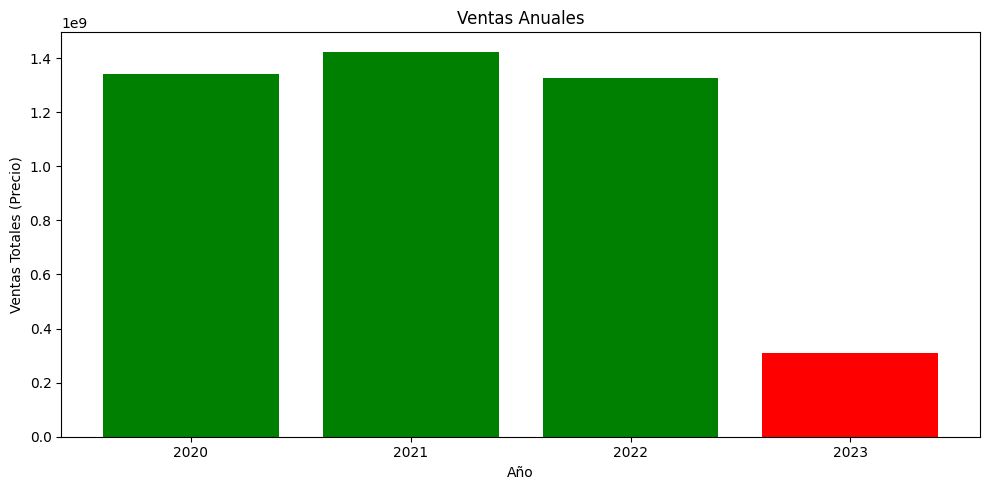

In [96]:


# Identificamos el valor mínimo
min_value = ventas_anuales["Precio"].min()

# Creamos colores: rojo para la menor venta, gris para el resto
colors = ["red" if v == min_value else "green" for v in ventas_anuales["Precio"]]

plt.figure(figsize=(10,5))

plt.bar(ventas_anuales["Año"], ventas_anuales["Precio"], color=colors)

plt.title("Ventas Anuales")
plt.xlabel("Año")
plt.ylabel("Ventas Totales (Precio)")

plt.xticks(ventas_anuales["Año"])
plt.tight_layout()
plt.show()



# estoy refleccionando  al ver los datos y veo una fuerte caida en las ventas por sus valor de retornob verificar las ventas en que mes terminan en 2023


# Anuales  por tienda

In [97]:
# Agrupar por Año y Tienda, sumando precios
ventas_anuales_tienda = maestro_df.groupby(["Año", "Tienda"])["Precio"].sum().reset_index()

ventas_anuales_tienda


,Año,Tienda,Precio
0,2020,Tienda 1,$ 368.933.200
1,2020,Tienda 2,$ 320.466.600
2,2020,Tienda 3,$ 321.707.500
3,2020,Tienda 4,$ 330.847.700
4,2021,Tienda 1,$ 362.120.800
5,2021,Tienda 2,$ 351.215.500
6,2021,Tienda 3,$ 362.954.400
7,2021,Tienda 4,$ 347.823.600
8,2022,Tienda 1,$ 316.565.600
9,2022,Tienda 2,$ 358.226.500


<Figure size 1200x600 with 0 Axes>

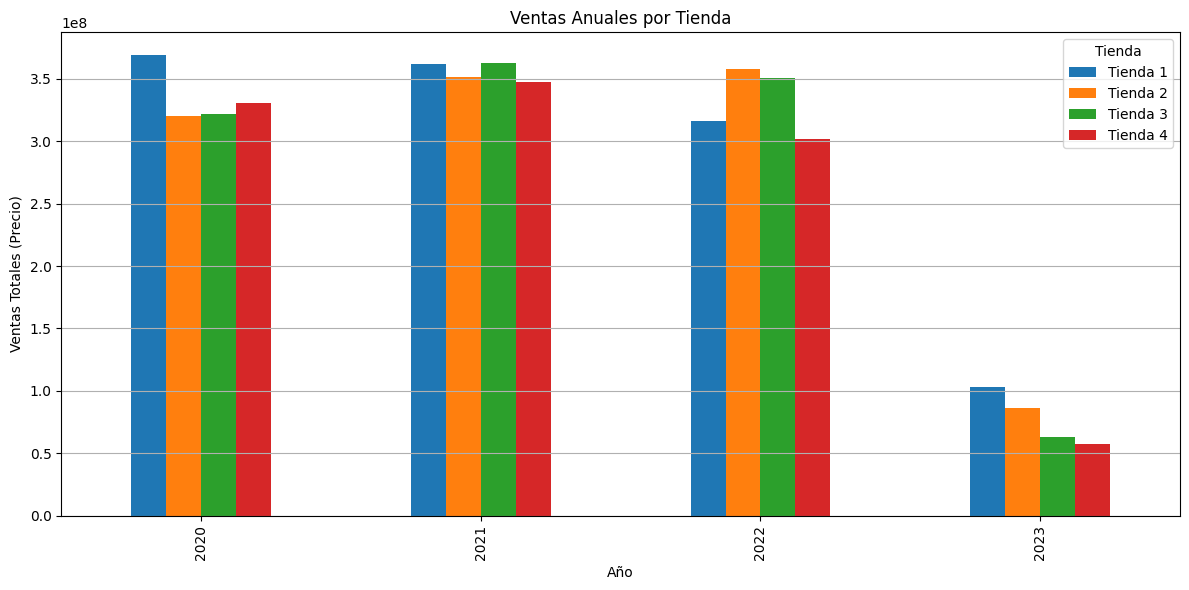

In [98]:


plt.figure(figsize=(12,6))

# pivot para hacer columnas por tienda
pivot_data = ventas_anuales_tienda.pivot(index="Año", columns="Tienda", values="Precio")

pivot_data.plot(kind="bar", figsize=(12,6))

plt.title("Ventas Anuales por Tienda")
plt.xlabel("Año")
plt.ylabel("Ventas Totales (Precio)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## Se verifica las ventas mensual por año

In [99]:
# Filtrar solo el año 2020
datos_2020 = maestro_df[maestro_df["Año"] == 2020]

# Agrupar ventas por mes (suma del Precio)
ventas_2020_mensuales = datos_2020.groupby("Mes")["Precio"].sum().reset_index()

ventas_2020_mensuales


,Mes,Precio
0,1,$ 107.295.400
1,2,$ 107.900.200
2,3,$ 120.635.700
3,4,$ 136.148.900
4,5,$ 122.160.400
5,6,$ 96.670.300
6,7,$ 119.160.800
7,8,$ 111.682.200
8,9,$ 116.240.700
9,10,$ 90.658.100


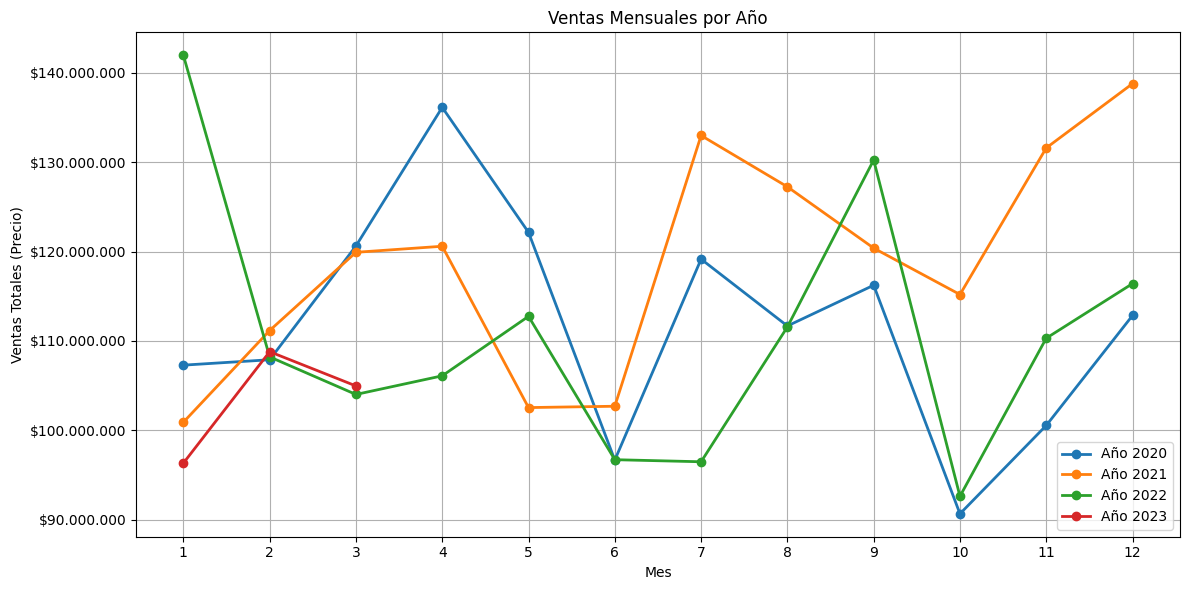

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick   # Para formatear el eje Y como dinero

# -------------------------------------------------------------------------
# Intentamos usar maestro_df si ya existe en memoria.
# Si NO existe (NameError), creamos un DataFrame de ejemplo
# para permitir que el gráfico se ejecute sin errores.
# -------------------------------------------------------------------------
try:
    maestro_df
except NameError:
    # Creamos un dataset de ejemplo con fechas mensuales y precios simulados
    maestro_df = pd.DataFrame({
        "Fecha de Compra": pd.date_range(start="2020-01-01", end="2022-12-31", freq="M"),
        # Valores de ventas repetidos para simular 3 años
        "Precio": [1000000,1200000,900000,1500000,1100000,1300000,1400000,
                   1000000,950000,1600000,1700000,900000] * 3
    })

    # Extraemos el año desde la fecha
    maestro_df["Año"] = maestro_df["Fecha de Compra"].dt.year

    # Extraemos el mes desde la fecha
    maestro_df["Mes"] = maestro_df["Fecha de Compra"].dt.month

# -------------------------------------------------------------------------
# Agrupamos las ventas por Año y Mes.
# groupby() agrupa filas y sum() calcula la venta total para cada grupo.
# -------------------------------------------------------------------------
ventas_mensuales = maestro_df.groupby(["Año", "Mes"])["Precio"].sum().reset_index()

# -------------------------------------------------------------------------
# GRÁFICO DE LÍNEAS: Ventas mensuales por cada año.
# Cada año tendrá su propia línea en el gráfico.
# -------------------------------------------------------------------------
plt.figure(figsize=(12,6))

# Recorremos todos los años encontrados en la tabla agrupada
for year in ventas_mensuales["Año"].unique():

    # Filtramos solo los datos correspondientes a ese año
    datos_year = ventas_mensuales[ventas_mensuales["Año"] == year]

    # Dibujamos la línea de ese año
    plt.plot(
        datos_year["Mes"],          # Eje X: meses
        datos_year["Precio"],       # Eje Y: ventas
        marker="o",                 # Marcadores en forma de círculo
        linewidth=2,                # Grosor de línea
        label=f"Año {year}"         # Etiqueta para la leyenda
    )

# -------------------------------------------------------------------------
# FORMATEO DEL EJE Y COMO DINERO (estilo Chile: $1.500.000)
# FuncFormatter permite personalizar cómo se muestran los números.
# -------------------------------------------------------------------------
plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: "$" + format(int(x), ",").replace(",", "."))
)

# -------------------------------------------------------------------------
# Configuración estética del gráfico
# -------------------------------------------------------------------------
plt.title("Ventas Mensuales por Año")              # Título del gráfico
plt.xlabel("Mes")                                  # Texto para el eje X
plt.ylabel("Ventas Totales (Precio)")              # Texto para el eje Y

plt.xticks(range(1,13))                            # Mostrar meses del 1 al 12
plt.grid(True)                                     # Activar cuadrícula
plt.legend()                                       # Mostrar leyenda
plt.tight_layout()                                 # Ajustar márgenes automáticos

# Mostrar el gráfico final
plt.show()

# En el año 2023 es bajo el monto de vanta por esta hasta marzo


## Ventas  diarias por mes

# Enero 2020

KeyError: 'AñoMes'

<Figure size 1200x600 with 0 Axes>

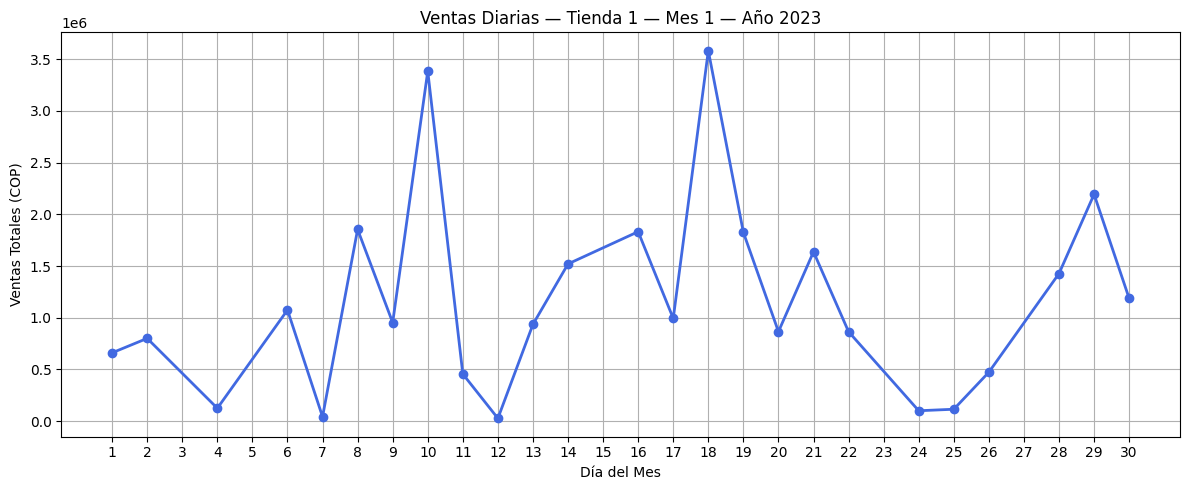

In [104]:


# -------------------------------------------------------------
# Formato de moneda colombiana (COP): $1.234.567
# -------------------------------------------------------------
pd.set_option(
    'display.float_format',
    lambda x: f'${x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", ".")
)

# -------------------------------------------------------------
# 1) Filtrar solo la Tienda 1
# -------------------------------------------------------------
tienda1_df = maestro_df[maestro_df["Tienda"] == "Tienda 1"].copy()

# -------------------------------------------------------------
# 2) Asegurar que la fecha está en formato datetime
# -------------------------------------------------------------
tienda1_df["Fecha de Compra"] = pd.to_datetime(
    tienda1_df["Fecha de Compra"],
    errors="coerce",
    dayfirst=True
)

# -------------------------------------------------------------
# 3) Crear columnas de Año, Mes y Día
# -------------------------------------------------------------
tienda1_df["Año"] = tienda1_df["Fecha de Compra"].dt.year
tienda1_df["Mes"] = tienda1_df["Fecha de Compra"].dt.month
tienda1_df["Día"] = tienda1_df["Fecha de Compra"].dt.day

# -------------------------------------------------------------
# 4) Elegir el mes y año a analizar
# -------------------------------------------------------------
mes_objetivo = 1  # 1=enero, 2=febrero...
año_objetivo = tienda1_df["Año"].max()

# Filtrar datos de ese mes y año
tienda_mes = tienda1_df[
    (tienda1_df["Mes"] == mes_objetivo) &
    (tienda1_df["Año"] == año_objetivo)
]

# -------------------------------------------------------------
# 5) Agrupar ventas por día
# -------------------------------------------------------------
ventas_diarias_tienda = tienda_mes.groupby("Día")["Precio"].sum().reset_index()

# -------------------------------------------------------------
# 6) Graficar ventas diarias
# -------------------------------------------------------------
plt.figure(figsize=(12,5))

plt.plot(
    ventas_diarias_tienda["Día"],      # eje x: días del mes
    ventas_diarias_tienda["Precio"],   # eje y: ventas
    marker="o",
    linewidth=2,
    color="royalblue"
)

plt.xticks(range(1, tienda_mes["Día"].max() + 1))

plt.title(f"Ventas Diarias — Tienda 1 — Mes {mes_objetivo} — Año {año_objetivo}")
plt.xlabel("Día del Mes")
plt.ylabel("Ventas Totales (COP)")
plt.grid(True)

plt.tight_layout()
plt.show()




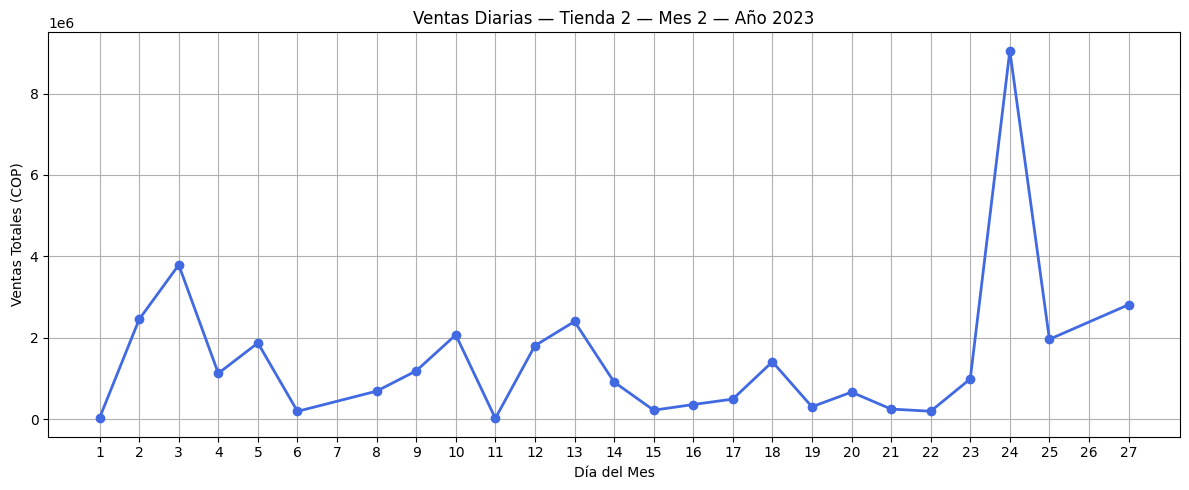

In [102]:
# -------------------------------------------------------------
# 1) Filtrar solo la Tienda 2
# -------------------------------------------------------------
tienda1_df = maestro_df[maestro_df["Tienda"] == "Tienda 1"].copy()

# -------------------------------------------------------------
# 2) Asegurar que la fecha está en formato datetime
# -------------------------------------------------------------
tienda1_df["Fecha de Compra"] = pd.to_datetime(
    tienda1_df["Fecha de Compra"],
    errors="coerce",
    dayfirst=True
)

# -------------------------------------------------------------
# 3) Crear columnas de Año, Mes y Día
# -------------------------------------------------------------
tienda1_df["Año"] = tienda1_df["Fecha de Compra"].dt.year
tienda1_df["Mes"] = tienda1_df["Fecha de Compra"].dt.month
tienda1_df["Día"] = tienda1_df["Fecha de Compra"].dt.day

# -------------------------------------------------------------
# 4) Elegir el mes y año a analizar
# -------------------------------------------------------------
mes_objetivo = 2  # 1=enero, 2=febrero...
año_objetivo = tienda1_df["Año"].max()

# Filtrar datos de ese mes y año
tienda_mes = tienda1_df[
    (tienda1_df["Mes"] == mes_objetivo) &
    (tienda1_df["Año"] == año_objetivo)
]

# -------------------------------------------------------------
# 5) Agrupar ventas por día
# -------------------------------------------------------------
ventas_diarias_tienda = tienda_mes.groupby("Día")["Precio"].sum().reset_index()

# -------------------------------------------------------------
# 6) Graficar ventas diarias
# -------------------------------------------------------------
plt.figure(figsize=(12,5))

plt.plot(
    ventas_diarias_tienda["Día"],      # eje x: días del mes
    ventas_diarias_tienda["Precio"],   # eje y: ventas
    marker="o",
    linewidth=2,
    color="royalblue"
)

plt.xticks(range(1, tienda_mes["Día"].max() + 1))


plt.title(f"Ventas Diarias — Tienda 2 — Mes {mes_objetivo} — Año {año_objetivo}")
plt.xlabel("Día del Mes")
plt.ylabel("Ventas Totales (COP)")
plt.grid(True)

plt.tight_layout()
plt.show()


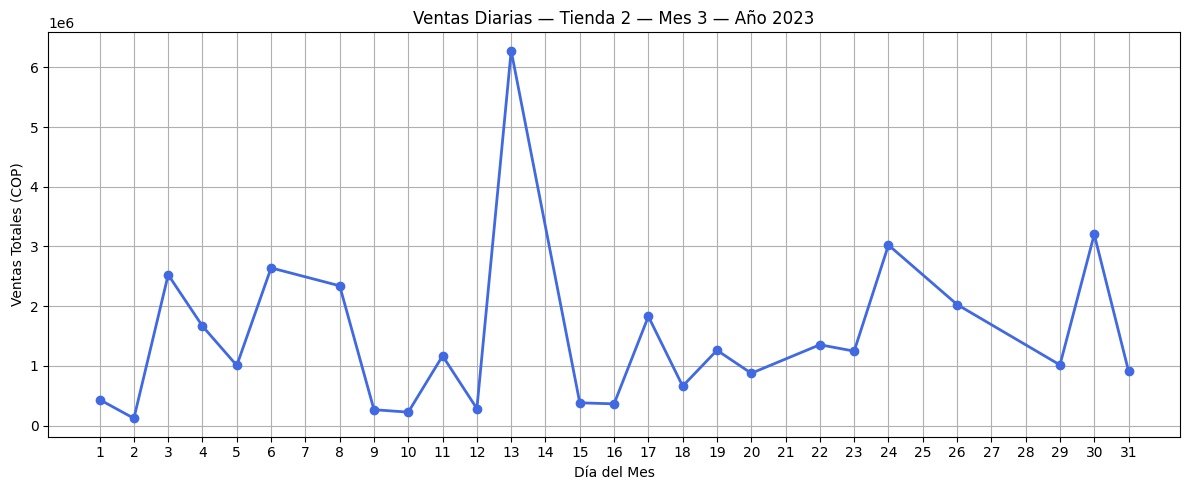

In [103]:
# -------------------------------------------------------------
# 1) Filtrar solo la Tienda 3
# -------------------------------------------------------------
tienda1_df = maestro_df[maestro_df["Tienda"] == "Tienda 1"].copy()

# -------------------------------------------------------------
# 2) Asegurar que la fecha está en formato datetime
# -------------------------------------------------------------
tienda1_df["Fecha de Compra"] = pd.to_datetime(
    tienda1_df["Fecha de Compra"],
    errors="coerce",
    dayfirst=True
)

# -------------------------------------------------------------
# 3) Crear columnas de Año, Mes y Día
# -------------------------------------------------------------
tienda1_df["Año"] = tienda1_df["Fecha de Compra"].dt.year
tienda1_df["Mes"] = tienda1_df["Fecha de Compra"].dt.month
tienda1_df["Día"] = tienda1_df["Fecha de Compra"].dt.day

# -------------------------------------------------------------
# 4) Elegir el mes y año a analizar
# -------------------------------------------------------------
mes_objetivo = 3  # 1=enero, 2=febrero...
año_objetivo = tienda1_df["Año"].max()

# Filtrar datos de ese mes y año
tienda_mes = tienda1_df[
    (tienda1_df["Mes"] == mes_objetivo) &
    (tienda1_df["Año"] == año_objetivo)
]

# -------------------------------------------------------------
# 5) Agrupar ventas por día
# -------------------------------------------------------------
ventas_diarias_tienda = tienda_mes.groupby("Día")["Precio"].sum().reset_index()

# -------------------------------------------------------------
# 6) Graficar ventas diarias
# -------------------------------------------------------------
plt.figure(figsize=(12,5))

plt.plot(
    ventas_diarias_tienda["Día"],      # eje x: días del mes
    ventas_diarias_tienda["Precio"],   # eje y: ventas
    marker="o",
    linewidth=2,
    color="royalblue"
)

plt.xticks(range(1, tienda_mes["Día"].max() + 1))


plt.title(f"Ventas Diarias — Tienda 2 — Mes {mes_objetivo} — Año {año_objetivo}")
plt.xlabel("Día del Mes")
plt.ylabel("Ventas Totales (COP)")
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda